<a href="https://colab.research.google.com/github/theBuluku/Mchezo_Pesa_Limited_Super_Project./blob/master/Mchezo_Pesa_Limited_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT.


A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

#Metrics of success.

On polynomial regression approach the metrics of success are RootMeanSquaredError and r2_score

On Logistic approach metrics of success are f1-score accuracy and confusion matrix

In [0]:
# Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2,bartlett
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')

#Exploratory Data Analysis.

In [0]:
rankings=pd.read_csv('fifa_ranking.csv')

In [0]:
results=pd.read_csv('results.csv')

In [182]:
rankings.head(6)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [183]:
results.head(6)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False


# Data statistics

In [184]:
#Provides basic statistics for the attributes-e,g counts percentiles,
#mean,standard deviation
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [185]:
rankings.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [186]:
#I found out the total number of rows and columns in the data set using “.shape”.
rankings.shape

(57793, 16)

In [187]:
results.shape

(40839, 9)

In [188]:
#It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not.
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [189]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [190]:
rankings.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [191]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [192]:
# Checking for null values in the rank dataset

rankings.isnull().sum().any()

False

In [193]:
# Checking for null values in the rank dataset

results.isnull().sum().any()

False

In [194]:
# Checking for duplicates
rankings.duplicated().any()

True

In [195]:
# Checking for duplicates
results.duplicated().any()

False

In [196]:
# Droping duplicates
rankings.drop_duplicates(keep ='first',inplace=True)

# Checking for duplicates whether they have actually been dropped
rankings.duplicated().any()

False

In [197]:
# Getting the number of unique countries in the rank datasets

unique_country = rankings.country_full.unique()
len(uniq_country)

216

In [198]:
# Getting the number of unique dates in the rank datasets

unique_dates = rankings.rank_date.unique()
len(uniq_dates)

286

In [199]:
# Getting the number of unique dates in the rank datasets

unique_dates = results.date.unique()
len(unique_dates)

15115

In [200]:
# Getting the number of unique dates in the rank datasets

unique_dates = rankings.rank_date.unique()
len(unique_dates)

286

#Combination of the Two Datasets.

In [0]:
# Checking unique dates that are common in both datasets

list1 = []

unique_dates  = list(unique_dates)
unique_date_results = list(unique_date_results)

for x in unique_dates:
  if x in unique_date_results:
    list1.append(x)
print(list1)
print(len(list1))

In [201]:
# Renaming the two columns for easier merging with the results datsets

rankings.rename(columns = {"country_full":"country","rank_date":"date"},inplace=True)
rankings.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date'],
      dtype='object')

In [202]:
# Merging the datasets using both the dates and country columns

fifa_df=pd.merge(rankings,results,on = ["date","country"])

# Previewing the merged dataset
fifa_df.head()
 

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False
1,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False
2,50,Zimbabwe,ZIM,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,False
3,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False
4,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False


In [203]:
# Getting the statistical information of the merged dataset
fifa_df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,64.905263,52.182116,474.214737,-0.116842,26.510495,26.510495,25.184116,12.592032,26.657200,7.997221,25.412653,5.082516,1.657895,1.042105
std,48.075168,190.135933,318.043068,4.420952,97.787086,97.787086,99.671465,49.835482,100.257323,30.077366,94.555624,18.911083,1.918743,1.234521
min,1.000000,0.000000,0.000000,-22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,233.500000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,0.000000,484.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,96.000000,0.000000,662.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,201.000000,1332.160000,1683.000000,30.000000,855.300000,855.300000,1008.940000,504.470000,748.610000,224.580000,640.010000,128.000000,31.000000,12.000000


In [204]:
# Getting the names of the columns in the merged dataset

fifa_df.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

# Checking for Outliers.

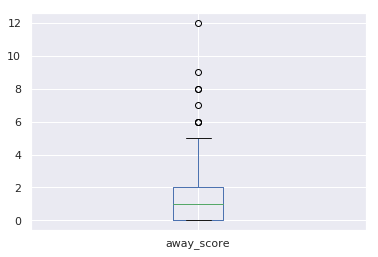

In [205]:
# checking for outlers
fifa_df['away_score'].plot(kind = 'box')

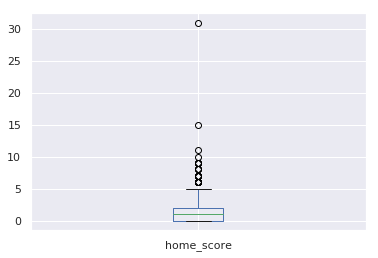

In [206]:
# checking for outlers of homescore

fifa_df['home_score'].plot(kind = 'box')

#VISUALISATION.

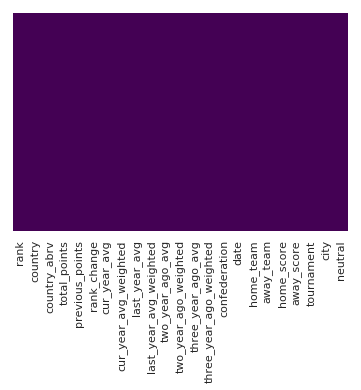

In [207]:
sns.heatmap(fifa_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

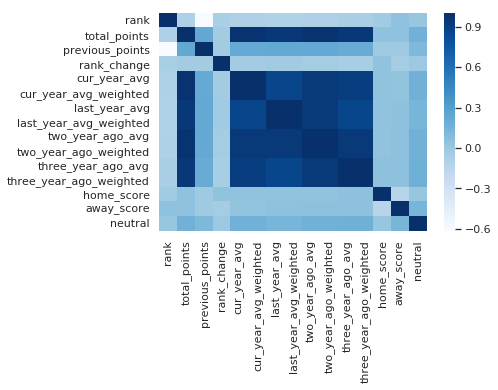

In [208]:
plt.figure(figsize=(6,4))
sns.heatmap(fifa_df.corr(),cmap='Blues',annot=False) 

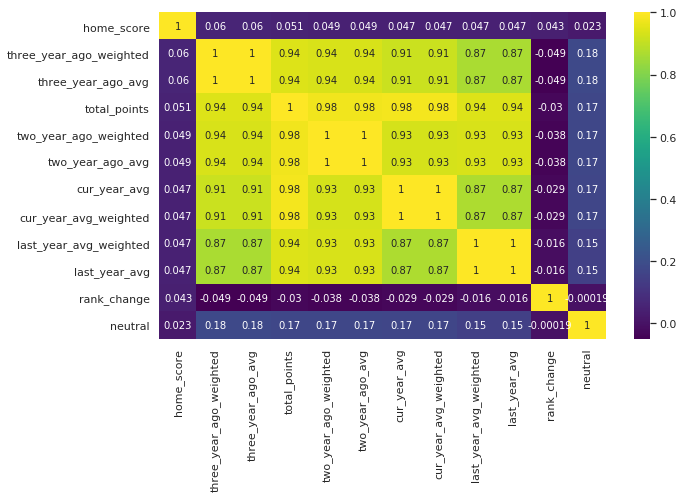

In [209]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = fifa_df.corr().nlargest(k, 'home_score')['home_score'].index
cm = fifa_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

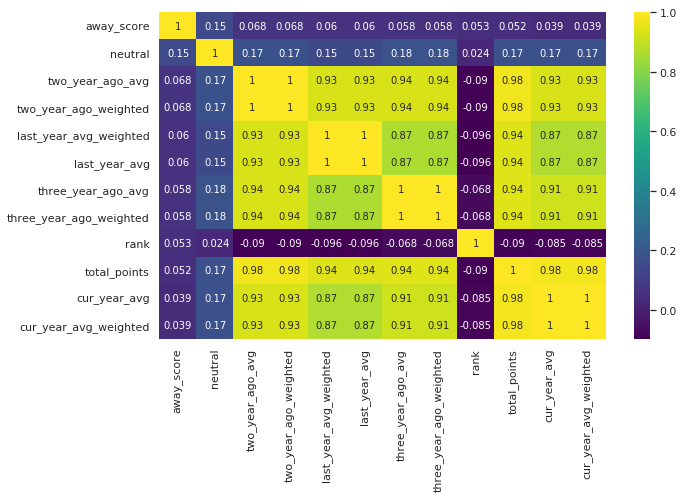

In [210]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = fifa_df.corr().nlargest(k, 'away_score')['away_score'].index
cm = fifa_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [211]:
# Dropping 'country abbrev' column

fifa_df.drop('country_abrv',inplace=True,axis=1)
fifa_df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,Brazil,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False
1,35,Ecuador,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False
2,50,Zimbabwe,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,False
3,59,Bolivia,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False
4,65,Guinea,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False


In [212]:
# Changing the categorical data fro data type object to category

fifa_df[['tournament', 'city','country','home_team', 'away_team','confederation']] = fifa_df[['tournament', 'city','country','home_team', 'away_team','confederation']].astype('category')
fifa_df.dtypes

rank                          int64
country                    category
total_points                float64
previous_points               int64
rank_change                   int64
cur_year_avg                float64
cur_year_avg_weighted       float64
last_year_avg               float64
last_year_avg_weighted      float64
two_year_ago_avg            float64
two_year_ago_weighted       float64
three_year_ago_avg          float64
three_year_ago_weighted     float64
confederation              category
date                         object
home_team                  category
away_team                  category
home_score                    int64
away_score                    int64
tournament                 category
city                       category
neutral                        bool
dtype: object

In [213]:
# Changing the data type of date from object to datetime

fifa_df['date'] = pd.to_datetime(fifa_df['date'])
fifa_df['date'].dtype

dtype('<M8[ns]')

In [214]:
# Changing categorical variable to integer using label encoder.

cat = ['tournament', 'city','country','home_team', 'away_team','confederation','neutral','date']
for i in cat:
  
  le = LabelEncoder()
  fifa_df[i] = le.fit_transform(fifa_df[i])
fifa_df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,22,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,26,106,1,1,18,201,0
1,35,38,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,50,188,5,0,17,291,0
2,50,155,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,188,57,2,0,18,127,0
3,59,19,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,23,185,3,1,17,175,0
4,65,56,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,71,154,1,0,18,79,0


# APPLICATION OF MACHINE LEARNING

# First Approach.

#1. Logistic Regression.

In [0]:
# Splitting the dataset into feature and target sets of away  team

X_away =fifa_df[['rank','home_team', 'away_team', 'home_score','tournament']]
y_away = fifa_df['away_score']

In [216]:
# Checking for multicollinearity
corra =X_away.corr()
multa = pd.DataFrame(np.linalg.inv(corra.values) ,index = corra.index ,columns = corra.columns)
multa

,rank,home_team,away_team,home_score,tournament
rank,1.015485,-0.013021,0.024572,0.026039,0.122624
home_team,-0.013021,1.004244,-0.031884,0.004235,0.051760
away_team,0.024572,-0.031884,1.014344,0.089102,0.078062
home_score,0.026039,0.004235,0.089102,1.012153,0.071133
tournament,0.122624,0.051760,0.078062,0.071133,1.027170


No multicolinearity

In [0]:
#splitting the train set and test set

x_away_train,x_away_test,y_away_train,y_away_test = train_test_split(X_away,y_away,test_size = 0.2,random_state =0)

In [218]:
# Predicting the model using linear regression
lr = LinearRegression()
lr.fit(x_away_train,y_away_train)

y_away_pred = lr.predict(x_away_test)
# Metrics of success
print("RMSE : ",np.sqrt(mean_squared_error(y_away_test,y_away_pred)))
comp = pd.DataFrame({"Actual":y_away_test,"Predicted":y_away_pred})
print(comp.describe())

RMSE :  1.153567685316895
           Actual   Predicted
count  190.000000  190.000000
mean     1.047368    1.051225
std      1.156014    0.196042
min      0.000000    0.411662
25%      0.000000    0.926923
50%      1.000000    1.046234
75%      2.000000    1.178495
max      7.000000    1.680917


The RMSE score of about 1.15 is which is than 10% of mean it's not very good prediction.



#2. Polynomial Regression.

In [219]:
# using polynomial regrresion to fit and predict the model
polynomial_fn =PolynomialFeatures(degree=2)
x_train_poly =polynomial_fn.fit_transform(x_away_train)
x_test_poly = polynomial_fn.fit_transform(x_away_test)

lr = LinearRegression()
lr.fit(x_train_poly,y_away_train)

y_away_poly_pred = lr.predict(x_test_poly)
#metrics of success
print(np.sqrt(mean_squared_error(y_away_test,y_away_poly_pred)))
comp = pd.DataFrame({"Actual":y_away_test,"Predicted":y_away_poly_pred}).head(20)
print(comp.describe())


1.1941803582571737
          Actual  Predicted
count  20.000000  20.000000
mean    1.000000   0.903021
std     1.025978   0.283668
min     0.000000   0.396146
25%     0.000000   0.817905
50%     1.000000   0.907949
75%     1.000000   1.037911
max     4.000000   1.425080


The RMSE score of 1.15 is higher than 10% of mean which is 0.1,hence its not very good but can still be used for prediction because its deviation is not big.

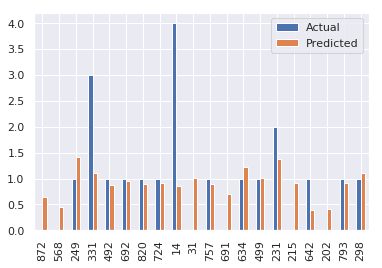

In [220]:
comp.plot(kind='bar')

#Barlet's Test.

In [221]:
# Checking for residuals
residuals = np.subtract(y_away_poly_pred, y_away_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.01829102860256824

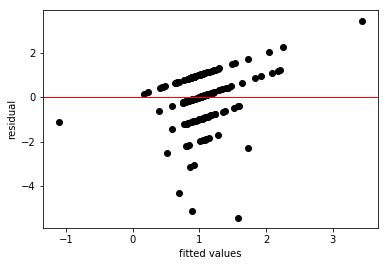

In [148]:
# Plotting the residuals against the fitted using a scatter plot

plt.scatter(y_away_poly_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#Second Approach.

In [222]:
# Creating the difference between the home scores and away scores inorder to identify whether it is awin a lose or adraw
fifa_df['diff'] = fifa_df['home_score'] - fifa_df['away_score']
fifa_df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,diff
0,8,22,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,26,106,1,1,18,201,0,0
1,35,38,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,50,188,5,0,17,291,0,5
2,50,155,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,188,57,2,0,18,127,0,2
3,59,19,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,23,185,3,1,17,175,0,2
4,65,56,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,71,154,1,0,18,79,0,1


In [223]:
def convert(goals):
  if goals > 0:
    return 'Win' # The positive differnce is a win
  elif goals < 0:
    return 'Lose' # The negative differnce is a lose
  else:
    return 'Draw' # The 0 differnce is a draw

fifa_df['diff'] = fifa_df['diff'].apply(lambda x: convert(x))
fifa_df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,diff
0,8,22,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,26,106,1,1,18,201,0,Draw
1,35,38,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,50,188,5,0,17,291,0,Win
2,50,155,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,188,57,2,0,18,127,0,Win
3,59,19,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,23,185,3,1,17,175,0,Win
4,65,56,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,71,154,1,0,18,79,0,Win


In [224]:
# Renaming the difference column to a status column
fifa_df.rename(columns ={'diff':'outcome'},inplace=True)
fifa_df.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'outcome'],
      dtype='object')

Text(0.5, 1.0, 'Countplot of Outcome')

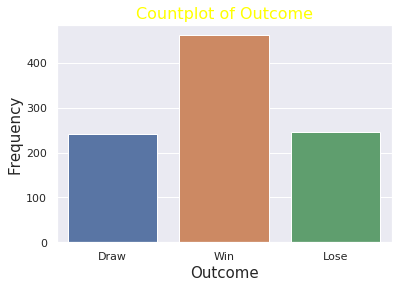

In [225]:
# visualizing the win draw and lose on a bar plot
sns.countplot('outcome',data=fifa_df)
plt.xlabel("Outcome",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Countplot of Outcome",fontsize=16,color="Yellow")

In [0]:
# splitting the data into feature set and a target set
X =fifa_df[['rank', 'country', 'total_points', 'previous_points', 'rank_change', 'confederation',
       'date', 'home_team', 'away_team', 
       'tournament', 'city', 'neutral']]
y = fifa_df['outcome']

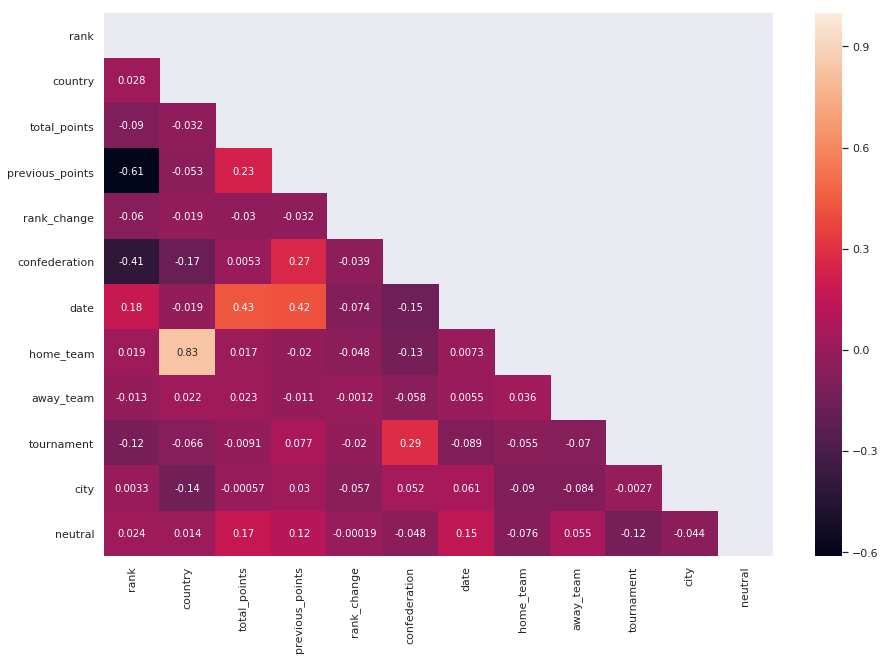

In [227]:
# Correlation heatmap of the numerical variables 
corr  =X.corr()

plt.figure(figsize = (15,10))
heatmap = np.zeros_like(X.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(X.corr(), annot=True, mask=heatmap)
plt.show()

There is no collinerity

In [228]:
# checking for multicollinearity
pd.DataFrame(np.linalg.inv(corr.values) ,index = corr.index ,columns = corr.columns)

,rank,country,total_points,previous_points,rank_change,confederation,date,home_team,away_team,tournament,city,neutral
rank,2.764558,0.200990,0.427592,2.154724,0.149009,0.353250,-1.480213,-0.137415,0.086212,-0.074329,0.024355,-0.181795
country,0.200990,3.484009,0.204551,0.197499,-0.032506,0.222527,-0.056243,-2.884282,0.072320,-0.017899,0.220558,-0.310920
total_points,0.427592,0.204551,1.335793,0.301984,0.014605,-0.020392,-0.752918,-0.203764,-0.005165,-0.041323,0.040976,-0.187336
previous_points,2.154724,0.197499,0.301984,3.095338,0.091320,-0.200396,-1.793304,-0.180136,0.064965,-0.101355,0.034283,-0.240770
rank_change,0.149009,-0.032506,0.014605,0.091320,1.023473,0.078329,0.014045,0.090381,0.011494,0.013058,0.054050,-0.004066
confederation,0.353250,0.222527,-0.020392,-0.200396,0.078329,1.357954,0.223302,-0.035477,0.051919,-0.293007,-0.041855,0.006492
date,-1.480213,-0.056243,-0.752918,-1.793304,0.014045,0.223302,2.374022,0.065851,-0.026988,0.108100,-0.101079,0.052351
home_team,-0.137415,-2.884282,-0.203764,-0.180136,0.090381,-0.035477,0.065851,3.428464,-0.082940,0.047192,-0.091557,0.357553
away_team,0.086212,0.072320,-0.005165,0.064965,0.011494,0.051919,-0.026988,-0.082940,1.020396,0.053965,0.083795,-0.056018
tournament,-0.074329,-0.017899,-0.041323,-0.101355,0.013058,-0.293007,0.108100,0.047192,0.053965,1.111866,0.027074,0.122201


In [229]:
# Testing my model with several classiffiers to see the better classifier
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Several list of classifiers
classifier = []
classifier.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(('RF', RandomForestClassifier()))
classifier.append(('NB', GaussianNB()))
classifier.append(('SVM', SVC(gamma='auto')))

results = []
names = []
# Implementing cross valiadtaion
for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.481579 (0.052202)
RF: 0.418421 (0.040470)
NB: 0.432895 (0.035159)
SVM: 0.481579 (0.033131)


In [230]:
# Here we want to fine tune our logistic regresion using Random Search:
# Here are some the parameters
parameter ={'multi_class' : ['ovr','auto'],
        'penalty' : ['l1','l2'],
        'C' : np.logspace(0, 4, 10)
       }
lr = LogisticRegression()

clf = RandomizedSearchCV(lr, parameter, cv=5, verbose=0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
    
# Perfomance metrics
print(clf.best_params_)
print(clf.best_score_)

{'penalty': 'l2', 'multi_class': 'ovr', 'C': 21.544346900318832}
0.49736842105263157


In [231]:
# Getting the Actual and predicted

diff = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
diff.head()

,Actual,Predicted
872,Win,Win
568,Win,Win
249,Lose,Lose
331,Lose,Win
492,Win,Win


In [232]:
# Perfomance metrics
print("Classification Report")
print(classification_report(y_test,y_pred))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Accuracy",accuracy_score(y_test,y_pred))


Classification Report
              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00        46
        Lose       0.32      0.12      0.18        48
         Win       0.51      0.91      0.65        96

    accuracy                           0.49       190
   macro avg       0.28      0.34      0.28       190
weighted avg       0.34      0.49      0.38       190

Confusion matrix
[[ 0  4 42]
 [ 1  6 41]
 [ 0  9 87]]
Accuracy 0.48947368421052634


I got an accuracy of 48% which is considerably low.

#Third Approach.

In [233]:
#Checking our dataset.
fifa_df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,outcome
0,8,22,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,26,106,1,1,18,201,0,Draw
1,35,38,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,50,188,5,0,17,291,0,Win
2,50,155,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,188,57,2,0,18,127,0,Win
3,59,19,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,23,185,3,1,17,175,0,Win
4,65,56,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,71,154,1,0,18,79,0,Win


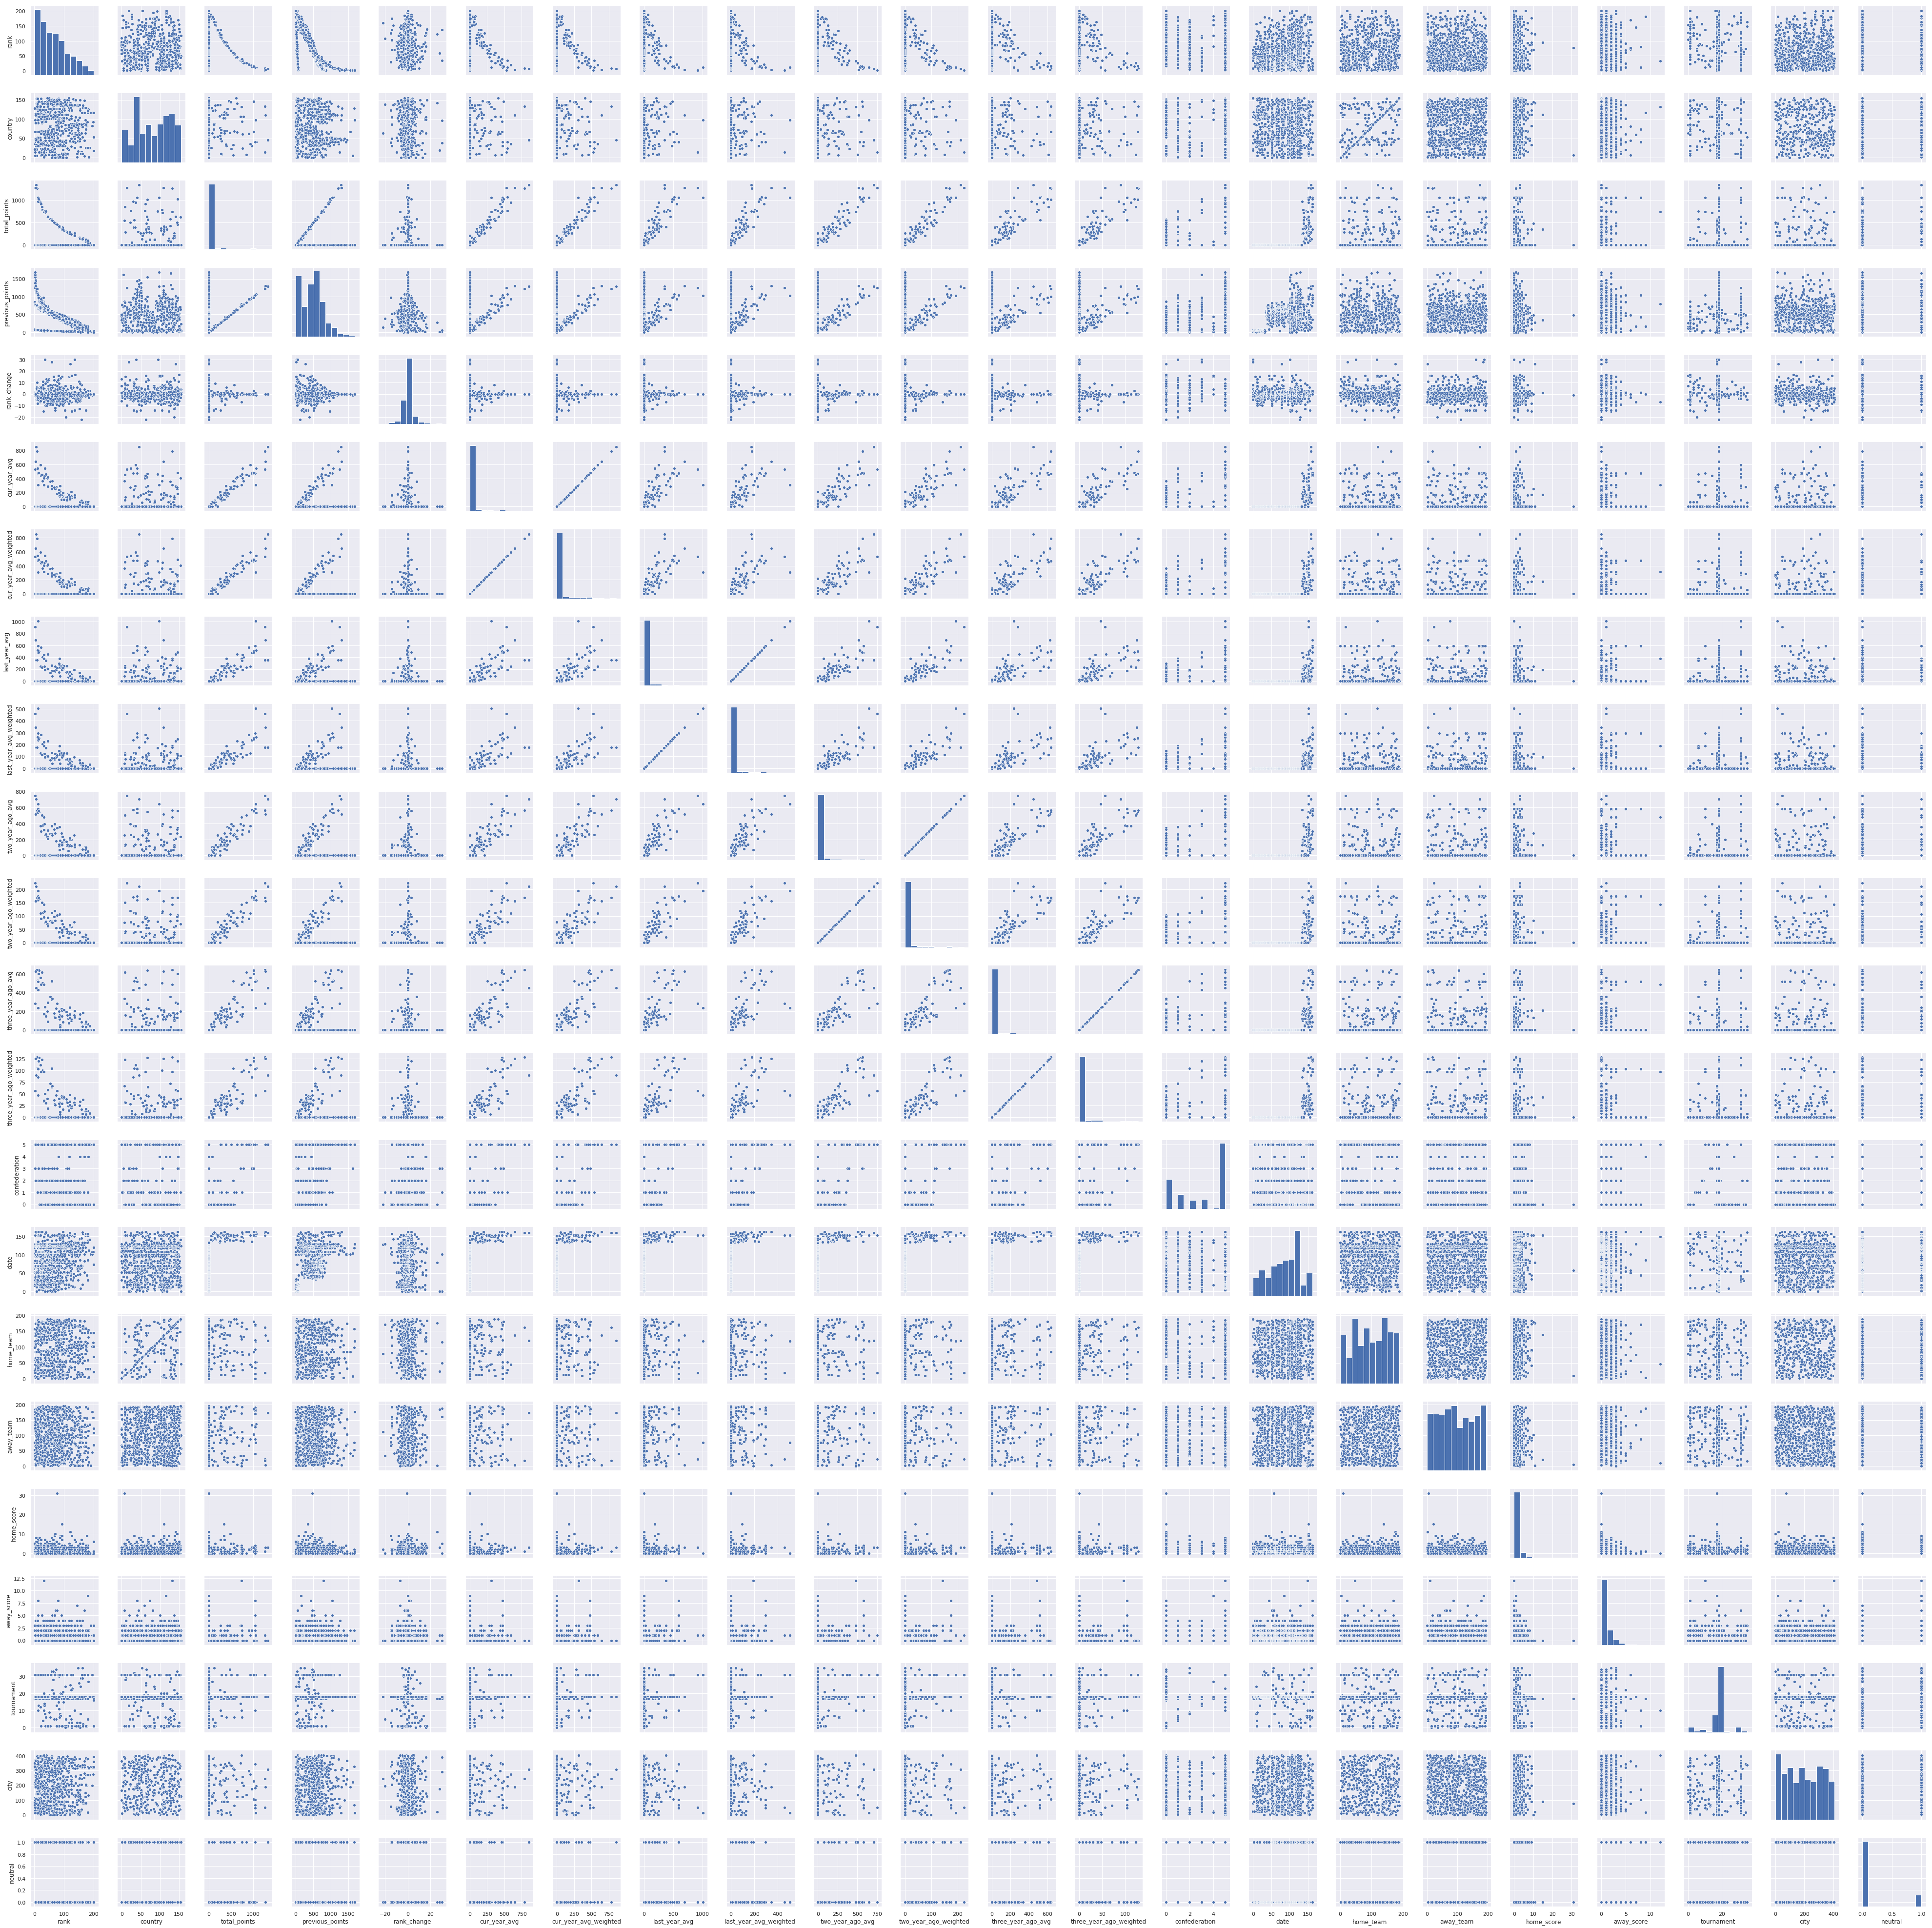

In [234]:
sns.pairplot(fifa_df)

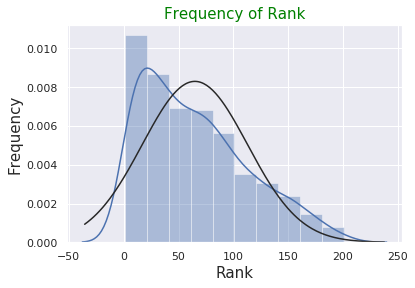

In [235]:
sns.set(style='darkgrid')
sns.distplot(fifa_df[fifa_df['rank'].isnull()==False]['rank'],fit=norm,bins=10)
plt.xlabel("Rank",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Frequency of Rank",fontsize=15,color ="green")
plt.show()

# Applying Ridge,Lasso and Elastic Net Regressions.

In [0]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [0]:
X = fifa_df.drop(['rank','outcome'],axis=1)
y = fifa_df['rank']

In [244]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = []
regressor.append(('linear',LinearRegression()))
regressor.append(('Ridge', Ridge()))
regressor.append(('Lasso', Lasso()))
regressor.append(('ElasticNet',ElasticNet()))

results = []
names = []
# Implementing cross validation
for name, model in regressor:
   kfold = KFold(n_splits=10, random_state=0)
   rg_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
   results.append(rg_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, rg_results.mean(), rg_results.std())
    
   print(msg)

linear: 0.592633 (0.118455)
Ridge: 0.592239 (0.117948)
Lasso: 0.591477 (0.115336)
ElasticNet: 0.591847 (0.115806)


In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

# Linear Regression

In [0]:
X = fifa_df.drop(['country','outcome','rank'],axis=1)
y = fifa_df['rank']

In [241]:
lr = LinearRegression()
lr.fit(x_train,y_train)
yl_pred = lr.predict(x_test)
print("r2_scores",r2_score(y_test,yl_pred))
lr_train_score = lr.score(x_train,y_train)
print("linear train scores",lr_train_score)
lr_test_score = lr.score(x_test,y_test)
print("linear test scores",lr_test_score)
coef_lr = len(lr.coef_)
print("The number of coefficients used are : ",coef_lr)

r2_scores 0.6741918383030865
linear train scores 0.6344369350065888
linear test scores 0.6741918383030865
The number of coefficients used are :  21


# Using Ridge Regression with different Parameters

In [0]:
R1 = Ridge(alpha=0.01)
R1.fit(x_train,y_train)
yR1_pred = R1.predict(x_test)
print("r2_score is ",r2_score(y_test,yR1_pred))

R1_train_score = RR1.score(x_train,y_train)
print("Ridge train scores of 0.01 is: ",RR1_train_score)
RR1_test_score = RR1.score(x_test,y_test)
print("Ridge test scores of 0.01 is :",RR1_test_score)
coef_RR1 = len(RR1.coef_!=0)
print("The number of coefficients used are : ",coef_RR1)
print("\n")
print("***********************************")

RR100 = Ridge(alpha=100)
RR100.fit(x_train,y_train)
yR100_pred = RR100.predict(x_test)
print("r2_score is ",r2_score(y_test,yr100_pred))

RR100_train_score = RR100.score(x_train,y_train)
print("Ridge train scores of 100",RR100_train_score)
RR100_test_score = RR100.score(x_test,y_test)
print("Ridge test scores of 100",Rr100_test_score)

coef_RR100 = len(RR100.coef_!=0)
print("The number of coefficients used are : ",coef_RR100)
print("\n")
print("***********************************")

# Regularisation by Ridge Regression.

In [252]:
dict1 ={
    "alpha" : [0.01,0.05,0.1,1,10,10,100],
    "normalize" : [True ,False],
    "max_iter" :[1000,10000]    
    
}
ridge = Ridge()
randse = RandomizedSearchCV(ridge,dict1,random_state=0,verbose=0,cv=10,scoring="r2")
randse.fit(x_train,y_train)
ybest_pred = randse.predict(x_test)
print(randse.best_params_)
print(randse.best_score_)

{'normalize': True, 'max_iter': 10000, 'alpha': 0.01}
0.5929495931694663


The reasonable alpha is of value 100

# Determination of Coefficients that have more weight for Prediction.

In [0]:
ridge = Ridge(normalize= False, max_iter= 1000, alpha= 0.05)
ridge.fit(x_train,y_train)

coefficients = ridge.coef_
important_coef ={}
for name,coef in zip(X.columns,coefficients):
  important_coef[name] = coef

OrderedDict(sorted(important_coef.items(), key=lambda t: abs(t[1]),reverse =True))

In [0]:
plt.plot(lr.coef_,alpha=0.5,linestyle='none',marker="*",markersize=5,color ="red",label = r'Linear; $\alpha = 1$',zorder=5)
plt.plot(RR.coef_,alpha=0.6,linestyle='none',marker="H",markersize=6,color="purple",label=r'Ridge; $\alpha = 1$')
plt.plot(rrn.coef_,alpha=0.6,linestyle='none',marker="o",markersize=7,color="yellow",label=r'Ridgenorm;$\alpha = 1$')
plt.plot(R1.coef_,alpha=0.6,linestyle='none',marker="v",markersize=8,color="magenta",label=r'Ridg;$\alpha = 0.01$')
plt.plot(RR100.coef_,alpha=0.6,linestyle='none',marker="D",markersize=9,color="green",label=r'Ridg;$\alpha = 100$')
plt.tight_layout()

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc="4")
plt.show()

In [256]:
fifa = pd.DataFrame({"Actual" : y_test,"Predicted" : ybest_pred})
fifa.sort_values(by = ['Actual'] ,inplace = True)
fifa.head(5)

,Actual,Predicted
378,1,21.405844
154,3,-3.793135
330,3,15.611509
331,4,23.790814
571,4,-16.144444


In [258]:
fifa.describe()

,Actual,Predicted
count,190.000000,190.000000
mean,64.978947,66.583417
std,49.371924,37.847301
min,1.000000,-43.085296
25%,23.000000,39.240349
50%,54.000000,65.287183
75%,98.750000,90.624533
max,201.000000,154.386273


In [259]:
#finding the mean squared error
np.sqrt(mean_squared_error(y_test,ybest_pred))

27.984168210339476

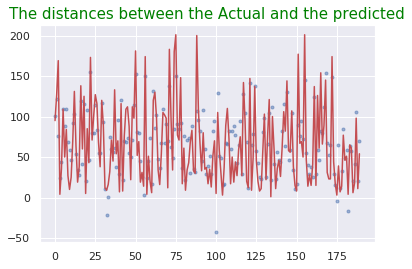

In [260]:
plt.plot(np.arange(0,len(ybest_pred),1),ybest_pred,'b.',alpha=0.5)
plt.plot(np.arange(0,len(y_test),1),y_test,'r-')
plt.title("The distances between the Actual and the predicted",fontsize=15,color="green")
plt.show()

There is a huge deviation of the Actual and Predicted outcomes.

# Challenge and Conclusion of Modelling.

1.Accuracy scores are evidently low and unreliable for all the  models used.This implies that the data was insuficient for our predictions.

2.Extra features such as country's GDP,Refering process and Climatic and Weather Conditions which have more weight on the goals scored by home teams would considerably improve the accuracy of the models.
